In [1]:
# Install specific versions known to work together
!pip install torch==2.0.0 torchvision==0.15.1
!pip install basicsr==1.4.2
!pip install facexlib==0.2.5
!pip install gfpgan==1.3.8

# Clone Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN

# Install Real-ESRGAN requirements
!pip install -r requirements.txt
!python setup.py develop

fatal: destination path 'Real-ESRGAN' already exists and is not an empty directory.
/content/Real-ESRGAN
/usr/local/lib/python3.11/dist-packages/setuptools/__init__.py:94: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running develop
/usr/local/lib/python3.11/dist-packages/setuptools/command/develop.py:41: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        sta

In [4]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

In [2]:
import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving Car_1_in.png to Car_1_in.png
Saving Car_2_in.png to Car_2_in.png
move Car_1_in.png to upload/Car_1_in.png
move Car_2_in.png to upload/Car_2_in.png


In [3]:
# if it is out of memory, try to use the `--tile` option
# We upsample the image with the scale factor X3.5
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 2 --fp32 --tile 200
# Arguments
# -n, --model_name: Model names
# -i, --input: input folder or image
# --outscale: Output scale, can be arbitrary scale factore.

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
Testing 0 Car_1_in
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Testing 1 Car_2_in
	Tile 1/15
	Tile 2/15
	Tile 3/15
	Tile 4/15
	Tile 5/15
	Tile 6/15
	Tile 7/15
	Tile 8/15
	Tile 9/15
	Tile 10/15
	Tile 11/15
	Tile 12/15
	Tile 13/15
	Tile 14/15
	Tile 15/15
	Tile 1/15
	Tile 2/15
	Tile 3/15
	Tile 4/15
	Tile 5/15
	Tile 6/15
	Tile 7/15
	Tile 8/15
	Tile 9/15
	Tile 10/15
	Tile 11/15
	Tile 12/15
	Tile 13/15
	Tile 14/15
	Tile 15/15


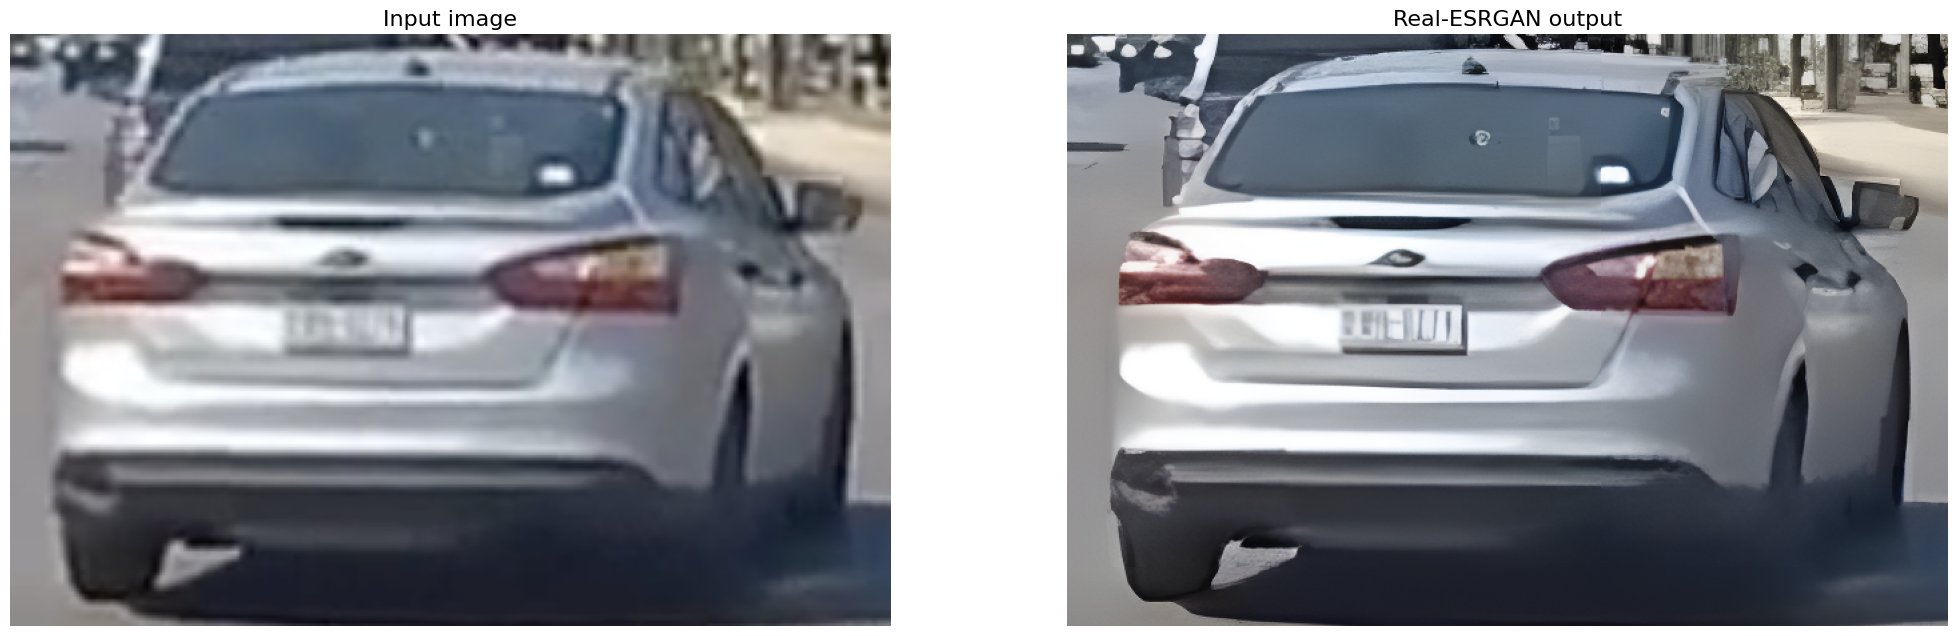

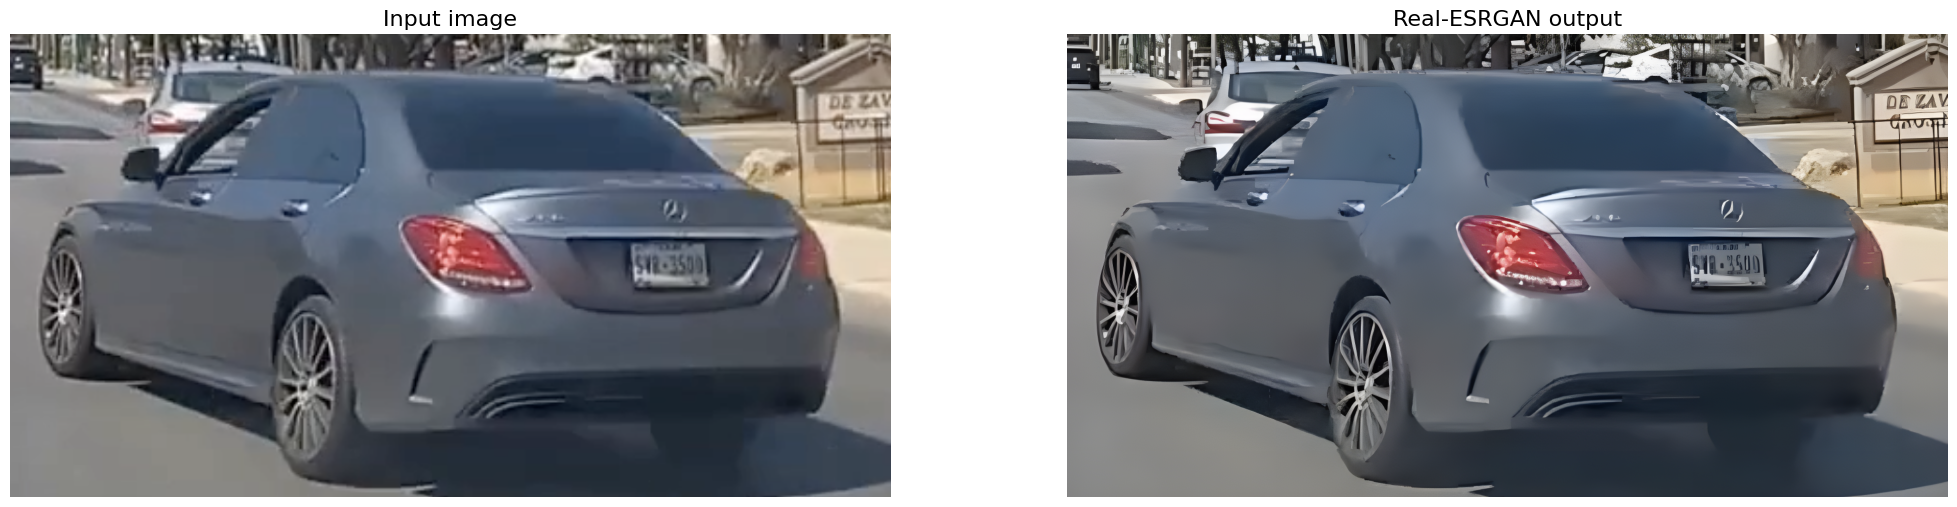

In [5]:
# display each image in the upload folder
import os
import glob

input_folder = 'upload'
result_folder = 'results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)